In [114]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
PROJECT_DIRECTORY = '/Users/duncan/Projects/intrinsic_alignments/'

In [115]:
# get table of halo properties
from astropy.table import Table
filepath = PROJECT_DIRECTORY+'data/MB2_subfind_z_1.0.hdf5'
data = Table.read(filepath, path='catalog')
for name in data.dtype.names:
    print(name)

# convert some properties to standard units
data['halos.m_star'] = data['halos.m_star']*10**10
data['halos.m_dm'] = data['halos.m_dm'] * 10.0**10.0
data['halos.m_bh'] = data['halos.m_bh'] * 10.0**10.0

data['halos.x'] = data['halos.x']/1000.0
data['halos.y'] = data['halos.y']/1000.0
data['halos.z'] = data['halos.z']/1000.0

data['groups.x'] = data['groups.x']/1000.0
data['groups.y'] = data['groups.y']/1000.0
data['groups.z'] = data['groups.z']/1000.0

Lbox = 100.0
dm_particle_mass = 1.1*10**7 

halos.subfindId
halos.central
halos.mass
halos.vdisp
halos.vcirc
halos.rcirc
halos.m_gas
halos.m_dm
halos.m_star
halos.m_bh
halos.x
halos.y
halos.z
halos.vx
halos.vy
halos.vz
groups.groupId
groups.subfindId
groups.mass
groups.m_gas
groups.m_dm
groups.m_star
groups.m_bh
groups.x
groups.y
groups.z
groups.vx
groups.vy
groups.vz
prop.sfr
prop.btr
prop.SDSS_g
prop.SDSS_i
prop.SDSS_r
prop.SDSS_u
prop.SDSS_z
shapesDM.q3d
shapesDM.s3d
shapesDM.q2d
shapesDM.a3d_x
shapesDM.a3d_y
shapesDM.a3d_z
shapesDM.b3d_x
shapesDM.b3d_y
shapesDM.b3d_z
shapesDM.c3d_x
shapesDM.c3d_y
shapesDM.c3d_z
shapesDM.a2d_x
shapesDM.a2d_y
shapesDM.b2d_x
shapesDM.b2d_y
shapesStar.q3d
shapesStar.s3d
shapesStar.q2d
shapesStar.a3d_x
shapesStar.a3d_y
shapesStar.a3d_z
shapesStar.b3d_x
shapesStar.b3d_y
shapesStar.b3d_z
shapesStar.c3d_x
shapesStar.c3d_y
shapesStar.c3d_z
shapesStar.a2d_x
shapesStar.a2d_y
shapesStar.b2d_x
shapesStar.b2d_y
tid500.a_x
tid500.a_y
tid500.a_z
tid500.b_x
tid500.b_y
tid500.b_z
tid500.c_x
tid500.c_y
tid500.

In [116]:
print("number of galaxies: ", len(data))

# check centrals and satellite

centrals = (data['halos.central']==1)
satellites = (data['halos.central']==0)

print("satellite fraction: ", np.sum(satellites)/len(data))

# get index of central galaxy

from halotools.utils import calculate_first_idx_unique_array_vals, crossmatch

cen_inds = calculate_first_idx_unique_array_vals(data['groups.groupId'])
inds1, inds2 = crossmatch(data['groups.groupId'], data['groups.groupId'][cen_inds])

central_indices = cen_inds[inds2]

number of galaxies:  5377647
satellite fraction:  0.248546808669


In [117]:
# get galaxy/halo coordinates in halotools format
coords = np.vstack((data['halos.x'],
                    data['halos.y'],
                    data['halos.z'])).T

# caclulate ellipticites and axis ratios
q_dm = data['shapesDM.q3d']
e_dm = (1.0-q_dm)/(1.0+q_dm**2)
s_dm = data['shapesDM.s3d']

q_gal = data['shapesStar.q3d']
e_gal = (1.0-q_gal)/(1.0+q_gal**2)
s_gal = data['shapesStar.s3d']

q_dm = data['shapesDM.q2d']
proj_e_dm = (1.0-q_dm)/(1.0+q_dm**2)

q_gal = data['shapesStar.q2d']
proj_e_gal = (1.0-q_gal)/(1.0+q_gal**2)

# calculate orientations
orientation_dm = np.vstack((data['shapesDM.a3d_x'],
                            data['shapesDM.a3d_y'],
                            data['shapesDM.a3d_z'])).T

orientation_gal = np.vstack((data['shapesStar.a3d_x'],
                             data['shapesStar.a3d_y'],
                             data['shapesStar.a3d_z'])).T

proj_orientation_dm = np.vstack((data['shapesDM.a2d_x'],
                                 data['shapesDM.a2d_y'])).T

proj_orientation_gal = np.vstack((data['shapesStar.a2d_x'],
                                  data['shapesStar.a2d_y'])).T

In [118]:
# satellite position orintations

x = (data['halos.x'] - data['halos.x'][central_indices])
y = (data['halos.y'] - data['halos.y'][central_indices])
z = (data['halos.z'] - data['halos.z'][central_indices])

cen_sat_direction = np.vstack((x,y,z)).T

In [119]:
N = len(data)
random_orientations = np.random.random((N,3))*2.0 - 1.0

In [120]:
from halotools.utils import normalized_vectors, angles_between_list_of_vectors

In [121]:
alignment_vectors = orientation_dm
alignment_vectors[satellites] = cen_sat_direction[satellites]
theta_misalignment = angles_between_list_of_vectors(alignment_vectors, orientation_gal)
#cos_theta_misalignment = np.fabs(np.cos(theta_misalignment))
cos_theta_misalignment = np.cos(theta_misalignment)
theta_misalignment = np.nan_to_num(theta_misalignment)

/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:88: RuntimeWarning: invalid value encountered in true_divide
  return vectors/elementwise_norm(vectors).reshape((npts, -1))
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:130: RuntimeWarning: invalid value encountered in greater
  mask1 = (dot > 1) & (dot < 1 + tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:130: RuntimeWarning: invalid value encountered in less
  mask1 = (dot > 1) & (dot < 1 + tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:132: RuntimeWarning: invalid value encountered in less
  mask2 = (dot < -1) & (dot > -1 - tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:132: RuntimeWarning: invalid value encountered in greater
  mask2 = (dot < -1) & (dot > -1 - tol)


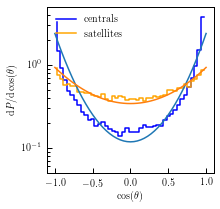

In [124]:
mask = (data['halos.m_star']>10**9) & centrals

costheta_bins = np.linspace(-1.0, 1.0, 45)
costheta_bin_centers = (costheta_bins[:-1]+costheta_bins[1:])/2.0
x = np.cos(theta_misalignment[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_1 = counts/np.sum(counts)/np.diff(costheta_bins)

mask = (data['halos.m_star']>10**9) & satellites

costheta_bins = np.linspace(-1.0, 1.0, 45)
x = np.cos(theta_misalignment[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_2 = counts/np.sum(counts)/np.diff(costheta_bins)

dist = DimrothWatson()
f1 = dist.pdf_costheta(costheta_bins, k=3.)
f2 = dist.pdf_costheta(costheta_bins, k=1)

fig  = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.step(costheta_bin_centers, normalized_counts_1, color='blue')
p2, = plt.step(costheta_bin_centers, normalized_counts_2, color='orange')
plt.plot(costheta_bins, f1)
plt.plot(costheta_bins, f2)
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$\mathrm{d}P/\mathrm{d}\cos(\theta)$')
plt.yscale('log')
plt.ylim([0.05,5])
plt.legend([p1,p2], ['centrals', 'satellites'], frameon=False, fontsize=10, loc='upper left')
plt.show()

In [123]:
from scipy.integrate import quad
from scipy.special import erf

class DimrothWatson(object):
    r"""
    Dimroth-Watson distribution
    """
    
    def __init__(self, k=0):
        self.k=0
    
    def _norm(self, k=0):
        r"""
        caclulate normalization constant
        """
        f = lambda t: 2.0*np.exp(k*t**2)
        norm = 1.0/quad(f, 0, 1)[0]
        return norm
    
    def pdf(self, theta, phi, k=0):
        r"""
        return the probability density
        """
        norm = self._norm(k)
        p_theta = norm*np.exp(k*np.cos(theta)**2)*np.sin(theta)
        p_phi = 1.0/(2.0*np.pi)
        return p_theta, p_phi
    
    def pdf_costheta(self, costheta, k=0):
        r"""
        return the probability density of cos(theta)
        """
        norm = self._norm(k)
        p_costheta = norm*np.exp(k*costheta**2)
        return p_costheta

from scipy.stats import rv_continuous
class cos_theta_dist(object):
    """
    """
    def _argcheck(self, k):
        return (k == k)
    
    def _norm(self, k):
        r"""
        caclulate normalization constant
        """
        f = lambda t: 2.0*np.exp(k*t**2)
        norm = 1.0/quad(f, 0, 1)[0]
        return norm
    
    def pdf(self, x, k):
        r"""
        return the probability density of cos(theta)
        """
        norm = self._norm(k)
        p_costheta = norm*np.exp(k*x**2)
        return p_costheta

    def log_likelihood(self, k, x):
        p = np.sum(np.log10(self.pdf(x, k)))
        return -1.0*p
    
    def cdf(self, x, k):
        if k==0:
            return 0.5*x+0.5
        else:
            norm = self._norm(k)
            y1 = np.sqrt(np.pi)*erf(np.sqrt(np.fabs(k))*(-1))/(2.0*np.sqrt(np.fabs(k)))
            y2 = np.sqrt(np.pi)*erf(np.sqrt(np.fabs(k))*x)/(2.0*np.sqrt(np.fabs(k)))
            y3 = np.sqrt(np.pi)*erf(np.sqrt(np.fabs(k)))/(2.0*np.sqrt(np.fabs(k)))
            return (y2-y1)/(y3-y1)

In [125]:
from scipy.stats import rv_continuous

class DimrothWatson(rv_continuous):
    """
    """
    def _argcheck(self, k):
        k = np.asarray(k)
        self.b = 1
        self.a = -1
        return (k == k)
    
    def _norm(self, k):
        """
        caclulate normalization constant
        """
        f = lambda t: 2.0*np.exp(k*t**2)
        norm = 1.0/quad(f, 0, 1)[0]
        return norm
    
    def _pdf(self, x, k):
        #x = (x+1)/2.0
        norm = self._norm(k)
        p = norm*np.exp(k*x**2)
        return p

In [134]:
mask = (data['halos.m_star']>10**9) & satellites
xx = np.cos(theta_misalignment[mask])

d = DimrothWatson()
d.fit(xx, 3)

(0.78260557772991124, 0.00017451983960933956, 1.0000034160901698)

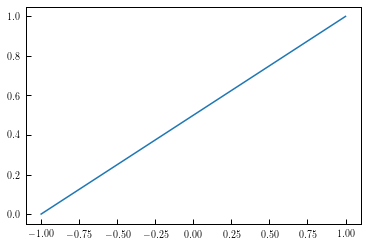

In [113]:
d = DimrothWatson()

x = np.linspace(-1,1,100)


plt.plot(x,y)
plt.show()

In [494]:
# fit alignemnts as a function of stellar mass
from scipy.optimize import minimize
d = cos_theta_dist()

mask = (data['halos.m_star']>10**9.0) & (data['halos.m_star']<10**9.5) & centrals
xx = np.cos(theta_misalignment[mask])
k=minimize(d.log_likelihood, [3], args=(xx,))['x'][0]
print(k)

mask = (data['halos.m_star']>10**9.5) & (data['halos.m_star']<10**10.0) & centrals
xx = np.cos(theta_misalignment[mask])
k=minimize(d.log_likelihood, [3], args=(xx,))['x'][0]
print(k)

mask = (data['halos.m_star']>10**10.0) & (data['halos.m_star']<10**10.5) & centrals
xx = np.cos(theta_misalignment[mask])
k=minimize(d.log_likelihood, [3], args=(xx,))['x'][0]
print(k)

mask = (data['halos.m_star']>10**10.5) & (data['halos.m_star']<10**11.0) & centrals
xx = np.cos(theta_misalignment[mask])
k=minimize(d.log_likelihood, [3], args=(xx,))['x'][0]
print(k)


mask = (data['halos.m_star']>10**9.0) & (data['halos.m_star']<10**9.5) & satellites
xx = np.cos(theta_misalignment[mask])
k=minimize(d.log_likelihood, [3], args=(xx,))['x'][0]
print(k)

mask = (data['halos.m_star']>10**9.5) & (data['halos.m_star']<10**10.0) & satellites
xx = np.cos(theta_misalignment[mask])
k=minimize(d.log_likelihood, [3], args=(xx,))['x'][0]
print(k)

mask = (data['halos.m_star']>10**10.0) & (data['halos.m_star']<10**10.5) & satellites
xx = np.cos(theta_misalignment[mask])
k=minimize(d.log_likelihood, [3], args=(xx,))['x'][0]
print(k)

mask = (data['halos.m_star']>10**10.5) & (data['halos.m_star']<10**11.0) & satellites
xx = np.cos(theta_misalignment[mask])
k=minimize(d.log_likelihood, [3], args=(xx,))['x'][0]
print(k)

3.24764407814
3.57703973995
3.63578430542
4.45061185405
0.772377298231
0.781777147113
0.875827855751
1.11533436485


# fit two population alignments

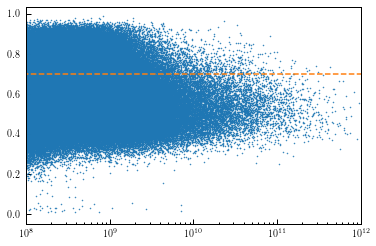

In [583]:
plt.figure()
plt.plot(data['halos.m_star'], s_gal, '.', ms=1, alpha=1)
plt.plot([10,10**13],[0.7,0.7], '--')
plt.xscale('log')
plt.xlim([10**8,10**12])
plt.show()

disks = s_gal<0.7
ellipticals = s_gal>0.7

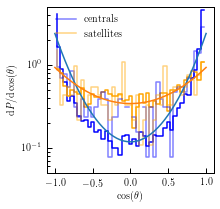

In [589]:
mask = (data['halos.m_star']>10**10) & centrals & disks

costheta_bins = np.linspace(-1.0, 1.0, 45)
costheta_bin_centers = (costheta_bins[:-1]+costheta_bins[1:])/2.0
x = np.cos(theta_misalignment[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_1 = counts/np.sum(counts)/np.diff(costheta_bins)

mask = (data['halos.m_star']>10**10) & satellites & disks

costheta_bins = np.linspace(-1.0, 1.0, 45)
x = np.cos(theta_misalignment[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_2 = counts/np.sum(counts)/np.diff(costheta_bins)

mask = (data['halos.m_star']>10**10) & centrals & ellipticals

costheta_bins = np.linspace(-1.0, 1.0, 45)
costheta_bin_centers = (costheta_bins[:-1]+costheta_bins[1:])/2.0
x = np.cos(theta_misalignment[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_3 = counts/np.sum(counts)/np.diff(costheta_bins)

mask = (data['halos.m_star']>10**10) & satellites & ellipticals

costheta_bins = np.linspace(-1.0, 1.0, 45)
x = np.cos(theta_misalignment[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_4 = counts/np.sum(counts)/np.diff(costheta_bins)



dist = DimrothWatson()
f1 = dist.pdf_costheta(costheta_bins, k=3.)
f2 = dist.pdf_costheta(costheta_bins, k=1)

fig  = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.step(costheta_bin_centers, normalized_counts_1, color='blue')
p2, = plt.step(costheta_bin_centers, normalized_counts_2, color='orange')
p1, = plt.step(costheta_bin_centers, normalized_counts_3, color='blue', alpha=0.5)
p2, = plt.step(costheta_bin_centers, normalized_counts_4, color='orange', alpha=0.5)
plt.plot(costheta_bins, f1)
plt.plot(costheta_bins, f2)
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$\mathrm{d}P/\mathrm{d}\cos(\theta)$')
plt.yscale('log')
plt.ylim([0.05,5])
plt.legend([p1,p2], ['centrals', 'satellites'], frameon=False, fontsize=10, loc='upper left')
plt.show()

In [595]:
np.arctan(100)/(np.pi/2)

0.99363401447018362

In [567]:
#reflect = (theta_misalignment > 90)
#theta_misalignment[reflect] = 90 - (theta_misalignment[reflect]-90)

mask = (data['halos.m_star']>10**9.5) & centrals

theta_bins = np.linspace(0, np.pi, 90)
counts = np.histogram(theta_misalignment[mask], bins=theta_bins)[0]
normalized_counts_1 = counts/np.sum(counts)/np.diff(theta_bins)

mask = (data['halos.m_star']>10**9.5) & satellites

theta_bins = np.linspace(0, np.pi, 90)
counts = np.histogram(theta_misalignment[mask], bins=theta_bins)[0]
normalized_counts_2 = counts/np.sum(counts)/np.diff(theta_bins)

f = DimrothWatson(theta_bins, k=4)

fig  = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.step(theta_bins[:-1], normalized_counts_1, color='blue')
p2, = plt.step(theta_bins[:-1], normalized_counts_2, color='orange')
plt.plot(theta_bins, f)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\mathrm{d}P/\mathrm{d}\theta$')
#plt.yscale('log')
#plt.ylim([0.001,0.03])
plt.legend([p1,p2], ['centrals', 'satellites'], frameon=False, fontsize=10, loc='upper right')
plt.show()

TypeError: __init__() got multiple values for keyword argument 'k'

In [140]:
a1 = 5
p1 = np.zeros(len(data)) + a1
a2 = 2
p1[satellites] = a2
#model_orientation_gal = axes_correlated_with_input_vector(orientation_dm, p1)
model_orientation_gal_1 = axes_correlated_with_input_vector(alignment_vectors, p1)

a1 = 15
p1 = np.zeros(len(data)) + a1
a2 = 2
p1[satellites] = a2
#model_orientation_gal = axes_correlated_with_input_vector(orientation_dm, p1)
model_orientation_gal_2 = axes_correlated_with_input_vector(alignment_vectors, p1)

a1 = 30
p1 = np.zeros(len(data)) + a1
a2 = 2
p1[satellites] = a2
#model_orientation_gal = axes_correlated_with_input_vector(orientation_dm, p1)
model_orientation_gal_3 = axes_correlated_with_input_vector(alignment_vectors, p1)

In [95]:
model_theta_misalignment = angles_between_list_of_vectors(alignment_vectors, model_orientation_gal)
model_cos_theta_misalignment = np.fabs(np.cos(model_theta_misalignment))
model_theta_misalignment = np.degrees(model_theta_misalignment)
model_theta_misalignment = np.nan_to_num(model_theta_misalignment)

reflect = (model_theta_misalignment > 90)
model_theta_misalignment[reflect] = 90 - (model_theta_misalignment[reflect]-90)

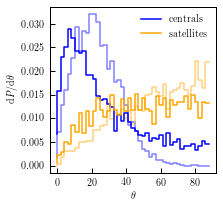

In [141]:
mask = (data['halos.m_star']>10**10) & centrals

theta_bins = np.linspace(0.0, 90, 45)
counts = np.histogram(model_theta_misalignment[mask], bins=theta_bins)[0]
model_normalized_counts_1 = counts/np.sum(counts)/np.diff(theta_bins)

mask = (data['halos.m_star']>10**10) & satellites

theta_bins = np.linspace(0.0, 90, 45)
counts = np.histogram(model_theta_misalignment[mask], bins=theta_bins)[0]
model_normalized_counts_2 = counts/np.sum(counts)/np.diff(theta_bins)


fig  = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.step(theta_bins[:-1], model_normalized_counts_1, color='blue', alpha=0.5)
plt.step(theta_bins[:-1], model_normalized_counts_2, color='orange', alpha=0.5)
p1, = plt.step(theta_bins[:-1], normalized_counts_1, color='blue')
p2, = plt.step(theta_bins[:-1], normalized_counts_2, color='orange')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\mathrm{d}P/\mathrm{d}\theta$')
#plt.yscale('log')
#plt.ylim([0.001,0.03])
plt.legend([p1,p2], ['centrals', 'satellites'], frameon=False, fontsize=10, loc='upper right')
plt.show()

In [97]:
from halotools.mock_observables.alignments import ee_3d, ed_3d, gi_plus_projected, gi_minus_projected

In [98]:
rbins = np.logspace(-1,1, 20)
rbin_centers = (rbins[:-1] + rbins[1:])/2.0

mask = (data['halos.m_dm']>10**11)
print("number of haloes: ", np.sum(mask))

result_ee_1 = ee_3d(coords[mask], orientation_gal[mask], coords[mask], orientation_gal[mask], rbins, period=100.0)
result_ed_1 = ed_3d(coords[mask], orientation_gal[mask], coords[mask], rbins, period=100.0)

number of haloes:  21443


In [118]:
model_result_ee_1 = ee_3d(coords[mask], model_orientation_gal_1[mask], coords[mask], model_orientation_gal_1[mask], rbins, period=100.0)
model_result_ed_1 = ed_3d(coords[mask], model_orientation_gal_1[mask], coords[mask], rbins, period=100.0)

In [119]:
model_result_ee_2 = ee_3d(coords[mask], model_orientation_gal_2[mask], coords[mask], model_orientation_gal_2[mask], rbins, period=100.0)
model_result_ed_2 = ed_3d(coords[mask], model_orientation_gal_2[mask], coords[mask], rbins, period=100.0)

In [120]:
model_result_ee_3 = ee_3d(coords[mask], model_orientation_gal_3[mask], coords[mask], model_orientation_gal_3[mask], rbins, period=100.0)
model_result_ed_3 = ed_3d(coords[mask], model_orientation_gal_3[mask], coords[mask], rbins, period=100.0)

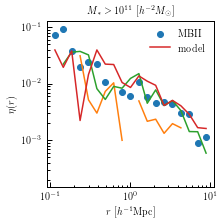

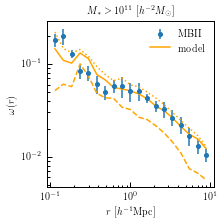

In [138]:
fig, axes = plt.subplots(1,1, sharex = True, sharey = True, figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax=axes
ax.set_title(r'$M_{*}>10^{11} ~[h^{-2}M_{\odot}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\eta(r)$')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
l1, = ax.plot(rbin_centers, result_ee_1, 'o')
l2, = ax.plot(rbin_centers, model_result_ee_1, '-')
l2, = ax.plot(rbin_centers, model_result_ee_2, '-')
l2, = ax.plot(rbin_centers, model_result_ee_3, '-')
ax.legend([l1,l2], ['MBII','model'], fontsize=10, frameon=False, loc='upper right')
plt.show()

fig, axes = plt.subplots(1,1, sharex = True, sharey = True, figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax=axes
ax.set_title(r'$M_{*}>10^{11} ~[h^{-2}M_{\odot}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\omega(r)$')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
l1 = ax.errorbar(rbin_centers, result_ed_1, yerr=(np.random.random(len(rbin_centers))*0.15+0.1)*result_ed_1,fmt='o', ms=4)
ax.plot(rbin_centers, model_result_ed_1, '--', color='orange', alpha=1)
l2, = ax.plot(rbin_centers, model_result_ed_2, '-', color='orange', alpha=1)
ax.plot(rbin_centers, model_result_ed_3, ':', color='orange', alpha=1)
ax.legend([l1,l2], ['MBII','model'], fontsize=10, frameon=False, loc='upper right')
plt.show()

fig.savefig('/Users/duncan/Desktop/MBII_ED.png', dpi=300)

In [18]:
import numpy as np
from astropy.utils.misc import NumpyRNGContext
from scipy.stats import powerlaw

def elementwise_dot(x, y):
    """ Calculate the dot product between
    each pair of elements in two input lists of 3d points.

    Parameters
    ----------
    x : ndarray
        Numpy array of shape (npts, 3) storing a collection of 3d points

    y : ndarray
        Numpy array of shape (npts, 3) storing a collection of 3d points

    Returns
    -------
    result : ndarray
        Numpy array of shape (npts, ) storing the dot product between each
        pair of corresponding points in x and y.
    """
    x = np.atleast_2d(x)
    y = np.atleast_2d(y)
    return np.sum(x*y, axis=1)


def elementwise_norm(x):
    """ Calculate the normalization of each element in a list of 3d points.

    Parameters
    ----------
    x : ndarray
        Numpy array of shape (npts, 3) storing a collection of 3d points

    Returns
    -------
    result : ndarray
        Numpy array of shape (npts, ) storing the norm of each 3d point in x.
    """
    x = np.atleast_2d(x)
    return np.sqrt(np.sum(x**2, axis=1))


def normalized_vectors(vectors):
    """ Return a unit-vector for each 3d vector in the input list of 3d points.

    Parameters
    ----------
    x : ndarray
        Numpy array of shape (npts, 3) storing a collection of 3d points

    Returns
    -------
    normed_x : ndarray
        Numpy array of shape (npts, 3)

    """
    vectors = np.atleast_2d(vectors)
    npts = vectors.shape[0]
    return vectors/elementwise_norm(vectors).reshape((npts, -1))


def random_perpendicular_directions(v, seed=None):
    """ Given an input list of 3d vectors, v, return a list of 3d vectors
    such that each returned vector has unit-length and is
    orthogonal to the corresponding vector in v.

    Parameters
    ----------
    v : ndarray
        Numpy array of shape (npts, 3) storing a collection of 3d vectors

    seed : int, optional
        Random number seed used to choose a random orthogonal direction

    Returns
    -------
    result : ndarray
        Numpy array of shape (npts, 3)

    """
    v = np.atleast_2d(v)
    npts = v.shape[0]
    with NumpyRNGContext(seed):
        w = np.random.random((npts, 3))

    vnorms = elementwise_norm(v).reshape((npts, 1))
    wnorms = elementwise_norm(w).reshape((npts, 1))

    e_v = v/vnorms
    e_w = w/wnorms

    v_dot_w = elementwise_dot(e_v, e_w).reshape((npts, 1))

    e_v_perp = e_w - v_dot_w*e_v
    e_v_perp_norm = elementwise_norm(e_v_perp).reshape((npts, 1))
    return e_v_perp/e_v_perp_norm


def powerlaw_index_smooth_transition(p):
    """ Compute the power law index associated with the correlation strength parameter.

    Parameters
    ----------
    p : ndarray
        Numpy array with shape (npts, ) defining the strength of the correlation
        between the orientation of the returned vectors and the z-axis.

        Positive (negative) values of `p` produce galaxy principal axes
        that are statistically aligned with the positive (negative) z-axis;
        the strength of this alignment increases with the magnitude of p.
        When p = 0, galaxy axes are randomly oriented.

    Returns
    -------
    index : ndarray
        Numpy array of shape (npts, ) storing the values that should be passed
        to `scipy.stats.powerlaw` to achieve the desired behavior.
    """
    return -np.where(p > 0, p + 1., p - 1.)
    #return 1.0/np.exp(p)


def axes_correlated_with_z(p, seed=None):
    r""" Calculate a list of 3d unit-vectors whose orientation is correlated
    with the z-axis (0, 0, 1).

    Parameters
    ----------
    p : ndarray
        Numpy array with shape (npts, ) defining the strength of the correlation
        between the orientation of the returned vectors and the z-axis.

        Positive (negative) values of `p` produce galaxy principal axes
        that are statistically aligned with the positive (negative) z-axis;
        the strength of this alignment increases with the magnitude of p.
        When p = 0, galaxy axes are randomly oriented.

    seed : int, optional
        Random number seed used to choose a random orthogonal direction

    Returns
    -------
    unit_vectors : ndarray
        Numpy array of shape (npts, 3)

    Notes
    -----
    The `axes_correlated_with_z` function works by modifying the standard method
    for generating random points on the unit sphere. In the standard calculation,
    the z-coordinate :math:`z = \cos(\theta)`, where :math:`\cos(\theta)` is just a
    uniform random variable. In this calculation, :math:`\cos(\theta)` is not
    uniform random, but is instead implemented as a clipped power law
    implemented with `scipy.stats.powerlaw`.
    """
    p = np.atleast_1d(p)
    #powerlaw_indices = powerlaw_index_smooth_transition(np.fabs(p))
    powerlaw_indices = powerlaw_index_smooth_transition(p)
    npts = powerlaw_indices.shape[0]

    with NumpyRNGContext(seed):
        phi = np.random.uniform(0, 2*np.pi, npts)
        uran = np.random.random(npts)

    cos_t = 2*powerlaw.isf(1-uran, np.abs(powerlaw_indices)) - 1.
    #cos_t = -1.0*powerlaw.isf(uran, powerlaw_indices, loc=0, scale=1) + 1

    sin_t = np.sqrt((1.-cos_t*cos_t))

    x = sin_t * np.cos(phi)
    y = sin_t * np.sin(phi)
    z = cos_t * np.sign(powerlaw_indices)

    return np.vstack((x, y, z)).T


def axes_correlated_with_input_vector(input_vectors, p=0., seed=None):
    r""" Calculate a list of 3d unit-vectors whose orientation is correlated
    with the orientation of `input_vectors`.

    Parameters
    ----------
    input_vectors : ndarray
        Numpy array of shape (npts, 3) storing a list of 3d vectors defining the
        preferred orientation with which the returned vectors will be correlated.

        Note that the normalization of `input_vectors` will be ignored.

    p : ndarray, optional
        Numpy array with shape (npts, ) defining the strength of the correlation
        between the orientation of the returned vectors and the z-axis.
        Default is zero, for no correlation.

        Positive (negative) values of `p` produce galaxy principal axes
        that are statistically aligned with the positive (negative) z-axis;
        the strength of this alignment increases with the magnitude of p.
        When p = 0, galaxy axes are randomly oriented.

    seed : int, optional
        Random number seed used to choose a random orthogonal direction

    Returns
    -------
    unit_vectors : ndarray
        Numpy array of shape (npts, 3)
    """
    input_unit_vectors = normalized_vectors(input_vectors)
    assert input_unit_vectors.shape[1] == 3
    npts = input_unit_vectors.shape[0]

    N = len(input_unit_vectors)

    if len(p) == 1:
        p = np.ones(N)*p

    # where p < 0, rotate input vector by 90 degrees
    anti_alignment_mask = (p < 0.0)
    #anti_alignment_mask = (p > np.inf)
    # rotate by 90 or -90
    angles = np.zeros(N)
    angles[anti_alignment_mask] = np.random.choice([np.pi/2.0, -1.0*np.pi/2.0], size=np.sum(anti_alignment_mask))
    # define a random rotation plane perendicular to the input vector
    ran_vectors = np.random.random((N, 3))*2.0-1.0
    rot_directions = vectors_normal_to_planes(input_unit_vectors, ran_vectors)
    rot_matrices = rotation_matrices_from_angles(angles, rot_directions)
    #replace input vectors with rotated vectors
    input_unit_vectors = rotate_vector_collection(rot_matrices, input_unit_vectors)

    z_correlated_axes = axes_correlated_with_z(p, seed)

    z_axes = np.tile((0, 0, 1), npts).reshape((npts, 3))

    # randomly flip input vectors, 180 degrees alignment = 0 degree alignment, i.e. ignore handedness
    ran = np.random.random(N)
    flip = 1.0*np.ones(N)
    flip[ran<0.5] = -1.0
    input_unit_vectors[:,0] = input_unit_vectors[:,0]*flip
    input_unit_vectors[:,1] = input_unit_vectors[:,1]*flip
    input_unit_vectors[:,2] = input_unit_vectors[:,2]*flip

    angles = angles_between_list_of_vectors(z_axes, input_unit_vectors)
    rotation_axes = vectors_normal_to_planes(z_axes, input_unit_vectors)
    matrices = rotation_matrices_from_angles(angles, rotation_axes)

    return rotate_vector_collection(matrices, z_correlated_axes)


def rotation_matrices_from_angles(angles, directions):
    """ Calculate a collection of rotation matrices defined by
    an input collection of rotation angles and rotation axes.

    Parameters
    ----------
    angles : ndarray
        Numpy array of shape (npts, ) storing a collection of rotation angles

    directions : ndarray
        Numpy array of shape (npts, 3) storing a collection of rotation axes in 3d

    Returns
    -------
    matrices : ndarray
        Numpy array of shape (npts, 3, 3) storing a collection of rotation matrices

    Notes
    -----
    The function `rotate_vector_collection` can be used to efficiently
    apply the returned collection of matrices to a collection of 3d vectors
    """
    directions = np.atleast_2d(directions)
    angles = np.atleast_1d(angles)
    npts = directions.shape[0]

    _dnorm = np.sqrt(np.sum(directions*directions, axis=1))
    directions = directions/_dnorm.reshape((npts, 1))

    sina = np.sin(angles)
    cosa = np.cos(angles)

    R1 = np.zeros((npts, 3, 3))
    R1[:, 0, 0] = cosa
    R1[:, 1, 1] = cosa
    R1[:, 2, 2] = cosa

    R2 = directions[..., None] * directions[:, None, :]
    R2 = R2*np.repeat(1.-cosa, 9).reshape((npts, 3, 3))

    directions *= sina.reshape((npts, 1))
    R3 = np.zeros((npts, 3, 3))
    R3[:, [1, 2, 0], [2, 0, 1]] -= directions
    R3[:, [2, 0, 1], [1, 2, 0]] += directions

    return R1 + R2 + R3


def rotation_matrices_from_vectors(v0, v1):
    """ Calculate a collection of rotation matrices defined by the unique
    transformation rotating v1 into v2 about the mutually perpendicular axis.

    Parameters
    ----------
    v0 : ndarray
        Numpy array of shape (npts, 3) storing a collection of initial vector orientations.

        Note that the normalization of `v0` will be ignored.

    v1 : ndarray
        Numpy array of shape (npts, 3) storing a collection of final vectors.

        Note that the normalization of `v1` will be ignored.

    Returns
    -------
    matrices : ndarray
        Numpy array of shape (npts, 3, 3) rotating each v0 into the corresponding v1

    Notes
    -----
    The function `rotate_vector_collection` can be used to efficiently
    apply the returned collection of matrices to a collection of 3d vectors
    """
    v0 = normalized_vectors(v0)
    v1 = normalized_vectors(v1)
    directions = vectors_normal_to_planes(v0, v1)
    angles = angles_between_list_of_vectors(v0, v1)

    return rotation_matrices_from_angles(angles, directions)


def angles_between_list_of_vectors(v0, v1, tol=1e-3):
    """ Calculate the angle between a collection of 3d vectors

    Examples
    --------
    v0 : ndarray
        Numpy array of shape (npts, 3) storing a collection of 3d vectors

        Note that the normalization of `v0` will be ignored.

    v1 : ndarray
        Numpy array of shape (npts, 3) storing a collection of 3d vectors

        Note that the normalization of `v1` will be ignored.

    tol : float, optional
        Acceptable numerical error for errors in angle.
        This variable is only used to round off numerical noise that otherwise
        causes exceptions to be raised by the inverse cosine function.
        Default is 0.001.

    Returns
    -------
    angles : ndarray
        Numpy array of shape (npts, ) storing the angles between each pair of
        corresponding points in v0 and v1.

        Returned values are in units of radians spanning [0, pi].
    """
    v0 = np.atleast_2d(v0)
    v1 = np.atleast_2d(v1)
    npts = v0.shape[0]
    v0 = v0/np.sqrt(np.sum(v0 * v0, axis=1)).reshape((npts, 1))
    v1 = v1/np.sqrt(np.sum(v1 * v1, axis=1)).reshape((npts, 1))

    dot = np.sum(v0 * v1, axis=1)

    #  Protect against tiny numerical excesses beyond the range [-1 ,1]
    mask1 = (dot > 1) & (dot < 1 + tol)
    dot = np.where(mask1, 1., dot)
    mask2 = (dot < -1) & (dot > -1 - tol)
    dot = np.where(mask2, -1., dot)

    return np.arccos(dot)


def vectors_normal_to_planes(x, y):
    """ Given a collection of 3d vectors x and y,
    return a collection of 3d unit-vectors that are orthogonal to x and y.

    Examples
    --------
    x : ndarray
        Numpy array of shape (npts, 3) storing a collection of 3d vectors

        Note that the normalization of `x` will be ignored.

    y : ndarray
        Numpy array of shape (npts, 3) storing a collection of 3d vectors

        Note that the normalization of `y` will be ignored.

    Returns
    -------
    z : ndarray
        Numpy array of shape (npts, 3). Each 3d vector in z will be orthogonal
        to the corresponding vector in x and y.
    """
    return normalized_vectors(np.cross(x, y))


def rotate_vector_collection(rotation_matrices, vectors):
    """ Given a collection of rotation matrices and a collection of 3d vectors,
    apply each matrix to rotate the corresponding vector.

    Examples
    --------
    rotation_matrices : ndarray
        Numpy array of shape (npts, 3, 3) storing a collection of rotation matrices

    vectors : ndarray
        Numpy array of shape (npts, 3) storing a collection of 3d vectors

    Returns
    -------
    rotated_vectors : ndarray
        Numpy array of shape (npts, 3) storing a collection of 3d vectors
    """
    return np.einsum('ijk,ik->ij', rotation_matrices, vectors)
